# Data Cleansing

### Import Python libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

### Import dataset

In [2]:
car_accidents=pd.read_csv("/Users/giangpham/Documents/upskill/Data UMGC/capstone/Road Accident Data.csv")
car_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [3]:
car_accidents.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


### Insights

* Recent trends in road accidents in London have begun to normalize after the coronavirus pandemic restriction. During the pandemic (2020-2021), traffic levels dropped significantly, and as a result, the number of people injured decreased. However, in 2022, there has been a return to more standard figures and injury patterns, aligning with the resurgence in travel after the easing of coronavirus restrictions. There were 23,465 reported collisions in London in 2022, resulting in 102 people being killed, 3,859 being seriously injured and 23,246 being slightly injured. (According to Transport For London).

* We will focused on these issues:
    - **Weather conditions:**
Describes the weather conditions at the time of the accident.
(Fine no high winds, Raining no high winds, Snowing no high winds, Raining and high winds, other).
    - **Road_surface_condition:**
Describes the surface conditions of the road at the time of the accident.
(Dry, Wet or Damp, Frost or Ice, Snow, Flood over 3cm deep).
    - **Light conditions:**
Describes the lighting conditions at the time of the accident.
(Daylight, Darkness – light lit, Darkness – no lighting, Darkness – lighting unknown, Darkness – lights unlit).


### Data Cleansing

<span style="color:blue">Drop unused columns</span>

In [4]:
car_accidents=car_accidents.drop(columns=['Carriageway_Hazards','Junction_Control','Junction_Detail','Police_Force'])


<span style="color:blue">Replace string 'Fetal' with 'Fatal' for simplicity</span>

In [5]:
car_accidents['Accident_Severity'].replace('Fetal','Fatal',inplace=True)

<span style="color:blue">Group and Remove Invalid data</span>

- Remove Raining no high winds, Raining high winds, and Dry Road, since it does not make sense when it's rain, the road is dry

In [6]:
grouped = car_accidents.groupby(['Weather_Conditions', 'Road_Surface_Conditions'])
filtered_df=grouped.filter(
    lambda x: not (('Raining + high winds' in x['Weather_Conditions'].values and 'Dry' in x['Road_Surface_Conditions'].values) or 
                   ('Raining no high winds' in x['Weather_Conditions'].values and 'Dry' in x['Road_Surface_Conditions'].values))
)

<span style="color:blue">Check for Null values</span>

In [7]:
filtered_df.isnull().sum().sort_values(ascending=False)

Road_Type                     1353
Time                            16
Accident_Index                   0
Number_of_Vehicles               0
Weather_Conditions               0
Urban_or_Rural_Area              0
Speed_limit                      0
Road_Surface_Conditions          0
Number_of_Casualties             0
Accident Date                    0
Longitude                        0
Local_Authority_(District)       0
Light_Conditions                 0
Latitude                         0
Accident_Severity                0
Day_of_Week                      0
Vehicle_Type                     0
dtype: int64

<span style="color:blue">Handling missing values</span>

In [8]:
filtered_df=filtered_df.dropna()

<span style="color:blue">Convert to datetime</span>

In [9]:
# 'Accident Date' columns
filtered_df['Accident Date'] = pd.to_datetime(filtered_df['Accident Date'],format='%m/%d/%Y')

# 'Time' columns
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'],format='%H:%M')


<span style="color:blue">Check information</span>

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300215 entries, 0 to 307972
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              300215 non-null  object        
 1   Accident Date               300215 non-null  datetime64[ns]
 2   Day_of_Week                 300215 non-null  object        
 3   Accident_Severity           300215 non-null  object        
 4   Latitude                    300215 non-null  float64       
 5   Light_Conditions            300215 non-null  object        
 6   Local_Authority_(District)  300215 non-null  object        
 7   Longitude                   300215 non-null  float64       
 8   Number_of_Casualties        300215 non-null  int64         
 9   Number_of_Vehicles          300215 non-null  int64         
 10  Road_Surface_Conditions     300215 non-null  object        
 11  Road_Type                   300215 non-null 

<span style="color:blue">Export as new data</span>

In [12]:
# car_accidents.to_csv('clean_version_new.csv',index=False)

Heatmap

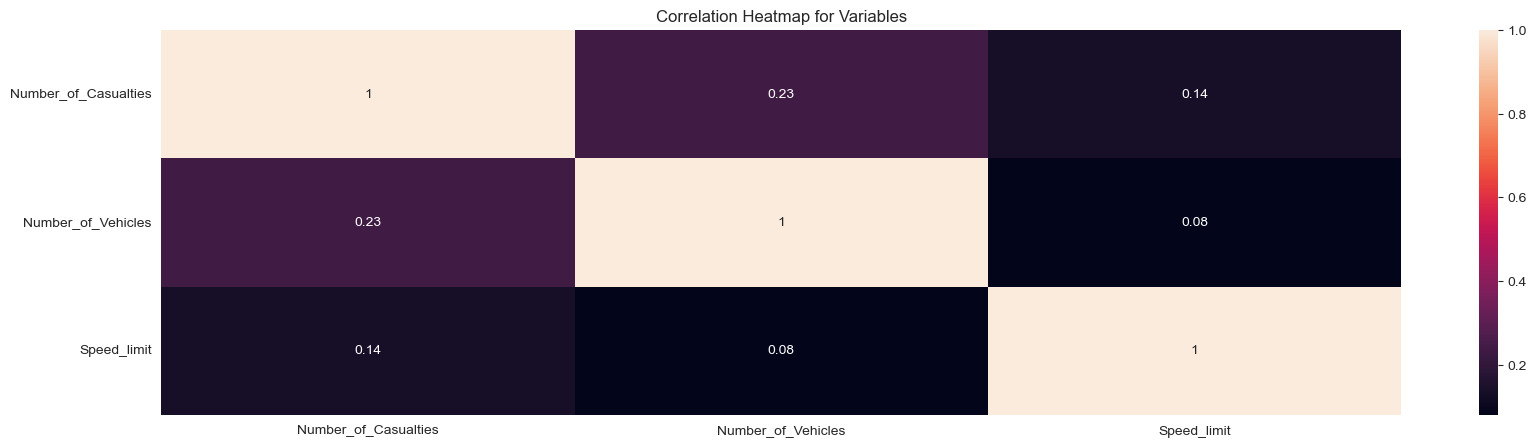

In [12]:
#only use numeric variables
car_accidentss=car_accidents[['Number_of_Casualties','Number_of_Vehicles','Speed_limit']]
correlation_data=car_accidentss.corr()

#create heatmap
sns.heatmap(correlation_data, annot=True)
plt.title ('Correlation Heatmap for Variables')
plt.show()

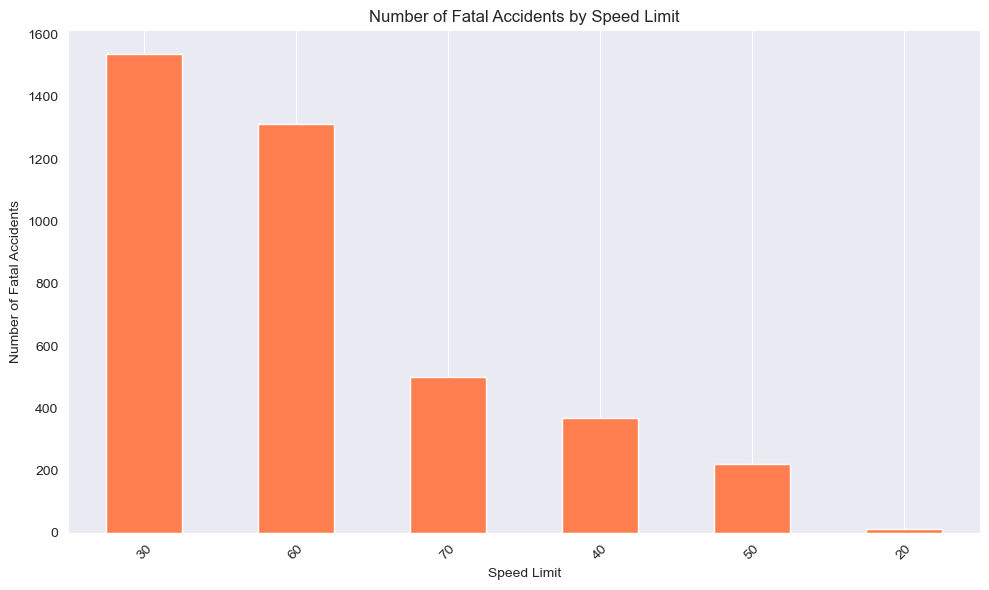

In [32]:
# Filter the dataframe to include only accidents with severity "Fatal"
fatal_accidents = car_accidents[car_accidents['Accident_Severity'] == 'Fatal']

# Group the filtered data by speed limit and count the number of fatal accidents
fatal_accidents_by_speed_limit = fatal_accidents.groupby('Speed_limit')['Accident_Index'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
fatal_accidents_by_speed_limit.plot(kind='bar', color='coral')
plt.title('Number of Fatal Accidents by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Fatal Accidents')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

line plot

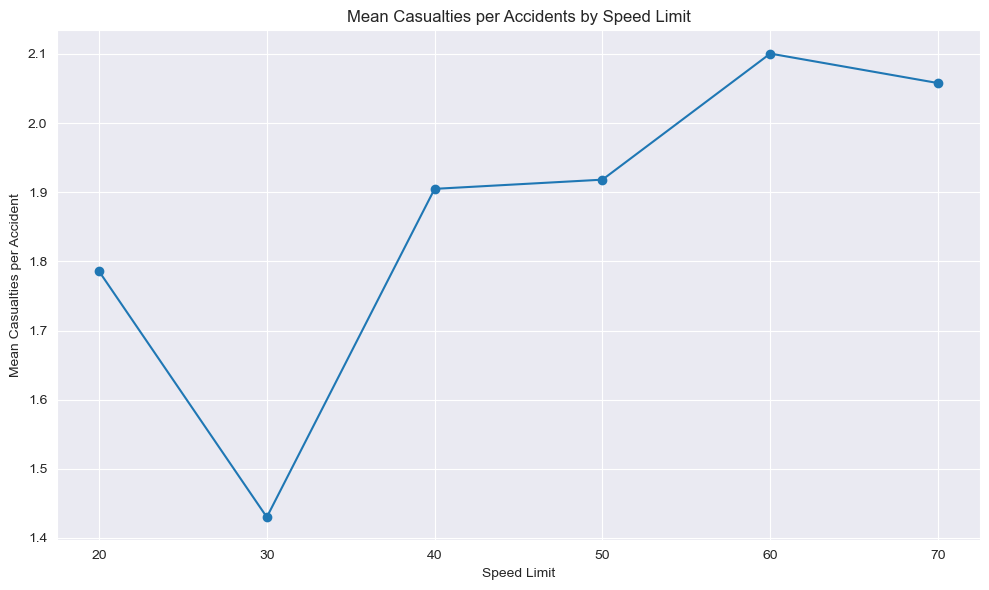

In [30]:

# Group by speed limit and calculate mean casualties per accident
mean_casualties_by_speed_limit = fatal_accidents.groupby('Speed_limit')['Number_of_Casualties'].mean()

# Plotting
plt.figure(figsize=(10, 6))
mean_casualties_by_speed_limit.plot(marker='o', linestyle='-')
plt.title('Mean Casualties per Accidents by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Mean Casualties per Accident')
plt.grid(True)
plt.xticks(mean_casualties_by_speed_limit.index)  # Set xticks to be the speed limits
plt.tight_layout()
plt.show()

bar plot

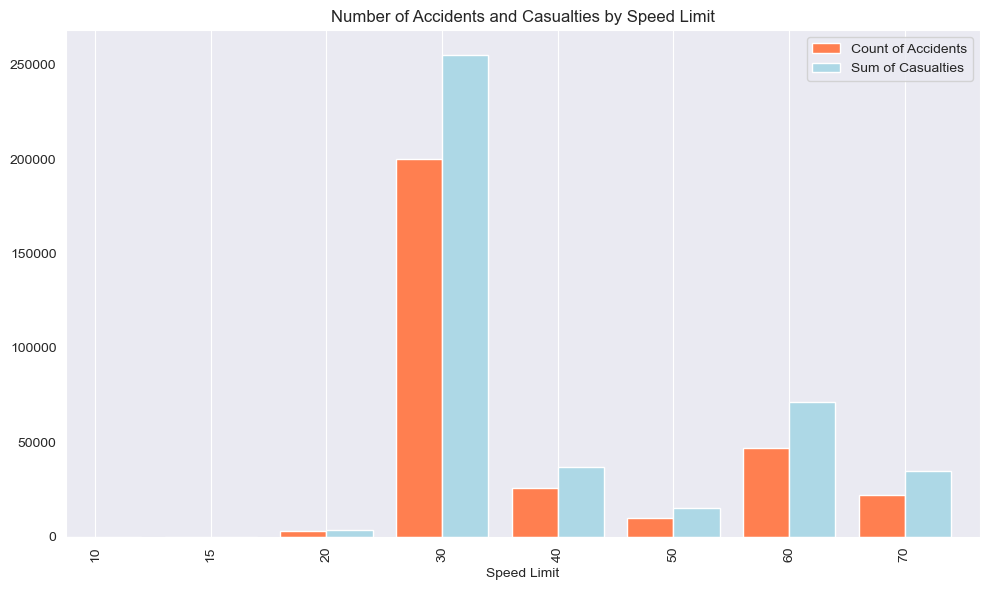

In [35]:
# Group by speed limit and calculate count of accidents and sum of casualties
grouped_data = car_accidents.groupby('Speed_limit').agg({'Accident_Index': 'count', 'Number_of_Casualties': 'sum'})

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for count of accidents (red bars)
grouped_data['Accident_Index'].plot(kind='bar', color='coral', width=0.4, position=1, label='Count of Accidents')

# Bar plot for sum of casualties (blue bars)
grouped_data['Number_of_Casualties'].plot(kind='bar', color='lightblue', width=0.4, position=0, label='Sum of Casualties')

plt.title('Number of Accidents and Casualties by Speed Limit')
plt.xlabel('Speed Limit')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

line plot (Number of accidents resulting in at least 1 fatality by speed limit)

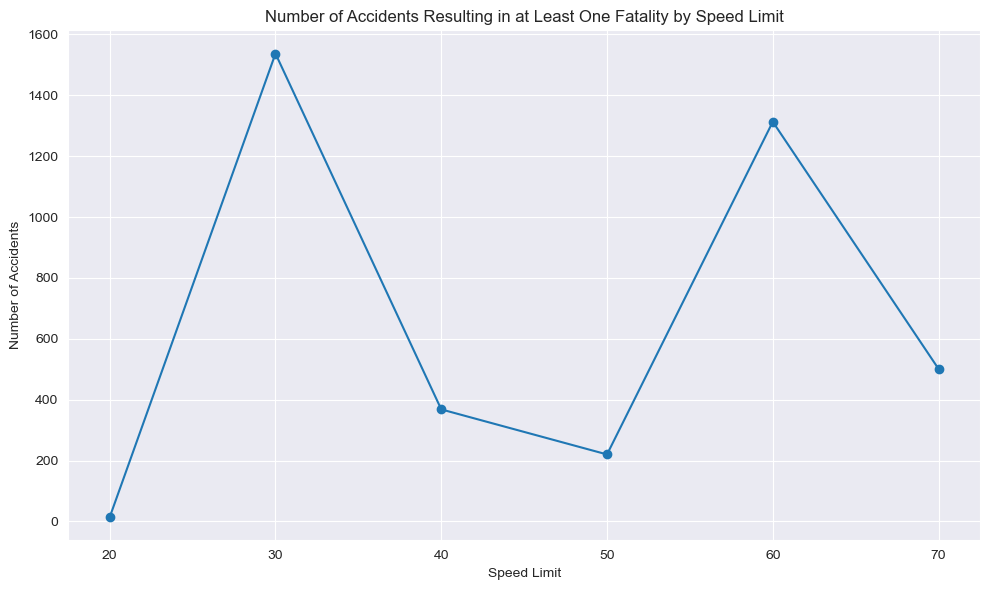

In [24]:
# Filter the dataframe to include only accidents resulting in at least one fatality
fatal_accidents = car_accidents[car_accidents['Accident_Severity'] == 'Fatal']

# Group the filtered data by speed limit and count the number of accidents
fatal_accidents_by_speed_limit = fatal_accidents.groupby('Speed_limit')['Accident_Index'].count()

# Plotting
plt.figure(figsize=(10, 6))
fatal_accidents_by_speed_limit.plot(marker='o', linestyle='-')
plt.title('Number of Accidents Resulting in at Least One Fatality by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(fatal_accidents_by_speed_limit.index)  # Set xticks to be the speed limits
plt.tight_layout()
plt.show()

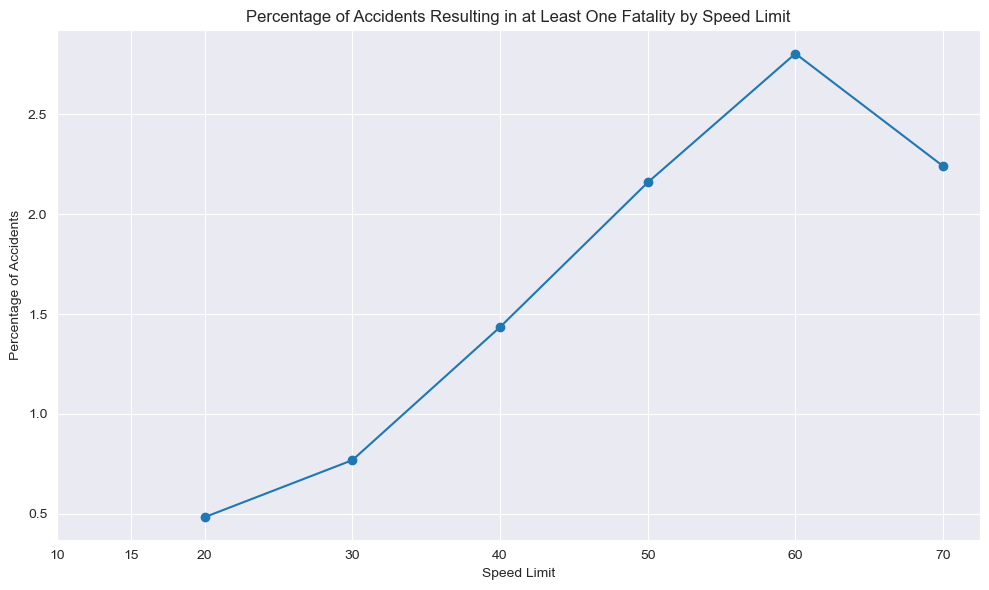

In [25]:
# Filter the dataframe to include only accidents with severity "Fatal"
fatal_accidents = car_accidents[car_accidents['Accident_Severity'] == 'Fatal']

# Group the total data by speed limit and count the number of accidents
total_accidents_by_speed_limit = car_accidents.groupby('Speed_limit')['Accident_Index'].count()

# Group the fatal accidents data by speed limit and count the number of accidents
fatal_accidents_by_speed_limit = fatal_accidents.groupby('Speed_limit')['Accident_Index'].count()

# Calculate the percentage of accidents resulting in at least one fatality for each speed limit
percentage_fatal_accidents_by_speed_limit = (fatal_accidents_by_speed_limit / total_accidents_by_speed_limit) * 100

# Plotting
plt.figure(figsize=(10, 6))
percentage_fatal_accidents_by_speed_limit.plot(marker='o', linestyle='-')
plt.title('Percentage of Accidents Resulting in at Least One Fatality by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Percentage of Accidents')
plt.grid(True)
plt.xticks(percentage_fatal_accidents_by_speed_limit.index)  # Set xticks to be the speed limits
plt.tight_layout()
plt.show()